In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


# 1.  Importing the datasets and first sight

We start by reading and loading the train and test datasets:

In [2]:
import pandas as pd
gender_submission = pd.read_csv("../input/titanic/gender_submission.csv")
test = pd.read_csv("../input/titanic/test.csv")
train = pd.read_csv("../input/titanic/train.csv")

I use the *head* and *describe* methods to get a first sight of both datasets:

In [3]:
train.head(), train.describe()

(   PassengerId  Survived  Pclass  \
 0            1         0       3   
 1            2         1       1   
 2            3         1       3   
 3            4         1       1   
 4            5         0       3   
 
                                                 Name     Sex   Age  SibSp  \
 0                            Braund, Mr. Owen Harris    male  22.0      1   
 1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                             Heikkinen, Miss. Laina  female  26.0      0   
 3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                           Allen, Mr. William Henry    male  35.0      0   
 
    Parch            Ticket     Fare Cabin Embarked  
 0      0         A/5 21171   7.2500   NaN        S  
 1      0          PC 17599  71.2833   C85        C  
 2      0  STON/O2. 3101282   7.9250   NaN        S  
 3      0            113803  53.1000  C123        S  
 4      0            373450   8.0500

In [4]:
test.head(), test.describe()

(   PassengerId  Pclass                                          Name     Sex  \
 0          892       3                              Kelly, Mr. James    male   
 1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
 2          894       2                     Myles, Mr. Thomas Francis    male   
 3          895       3                              Wirz, Mr. Albert    male   
 4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   
 
     Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
 0  34.5      0      0   330911   7.8292   NaN        Q  
 1  47.0      1      0   363272   7.0000   NaN        S  
 2  62.0      0      0   240276   9.6875   NaN        Q  
 3  27.0      0      0   315154   8.6625   NaN        S  
 4  22.0      1      1  3101298  12.2875   NaN        S  ,
        PassengerId      Pclass         Age       SibSp       Parch        Fare
 count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
 me

# 2. Cleaning and preparing data

## 2.1 Dealing with Null values

Let's see the number of null values in each column in both datasets:

In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Define a function to compute the percentage of null-values in each column:

In [7]:
def null_percentage (df):
    for column in df:
        print(column +':', 100 * df[column].isnull().sum()/len(df[column]))

Apply the function to the train set:

In [8]:
null_percentage(train)

PassengerId: 0.0
Survived: 0.0
Pclass: 0.0
Name: 0.0
Sex: 0.0
Age: 19.865319865319865
SibSp: 0.0
Parch: 0.0
Ticket: 0.0
Fare: 0.0
Cabin: 77.10437710437711
Embarked: 0.2244668911335578


and to the test set:

In [9]:
null_percentage(test)

PassengerId: 0.0
Pclass: 0.0
Name: 0.0
Sex: 0.0
Age: 20.574162679425836
SibSp: 0.0
Parch: 0.0
Ticket: 0.0
Fare: 0.23923444976076555
Cabin: 78.22966507177034
Embarked: 0.0


We see that the 'Cabin' column has a 77% of null values, while the 'Age' column is only 20% null. Knowing the % of null values for each feature will help in the task of discarding not useful features. In this case, as 'Cabin' has a lot of null values, maybe it's better to drop it. 

## 2.2 Droping useless columns

We drop a list of columns as a base, but probably we will reinclude some of them again to improve the models.
EDIT: we ended reincluding them, and using feature engineering to give more info and features to the ML models.

In [10]:
train.drop(['PassengerId', 'Cabin', 'Ticket'], axis=1, inplace=True)
test.drop(['Cabin', 'Ticket'], axis=1, inplace=True)

## 2.3 Fill NaN values in the remaining columns

In the case that a feature has a low percentage of null values, we can try to fill them using several methods: median, mode, regression models to predict the values... I choose to input the median for the numerical features and the mode for the categorical column:

In [11]:
train.Age.fillna(train['Age'].median(), inplace=True), test.Age.fillna(test['Age'].median(), inplace=True)

(None, None)

In [12]:
train.Embarked.fillna(train['Embarked'].mode()[0], inplace=True)

In [13]:
train.Fare.fillna(train['Fare'].median(), inplace=True), test.Fare.fillna(test['Fare'].median(), inplace=True)

(None, None)

And now, the train and test datasets are 100% complete, without null values.

In [14]:
train.info(), train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


(None,
          Survived      Pclass         Age       SibSp       Parch        Fare
 count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
 mean     0.383838    2.308642   29.361582    0.523008    0.381594   32.204208
 std      0.486592    0.836071   13.019697    1.102743    0.806057   49.693429
 min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
 25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.910400
 50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
 75%      1.000000    3.000000   35.000000    1.000000    0.000000   31.000000
 max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200)

In [15]:
test.info(), test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 29.5+ KB


(None,
        PassengerId      Pclass         Age       SibSp       Parch        Fare
 count   418.000000  418.000000  418.000000  418.000000  418.000000  418.000000
 mean   1100.500000    2.265550   29.599282    0.447368    0.392344   35.576535
 std     120.810458    0.841838   12.703770    0.896760    0.981429   55.850103
 min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
 25%     996.250000    1.000000   23.000000    0.000000    0.000000    7.895800
 50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
 75%    1204.750000    3.000000   35.750000    1.000000    0.000000   31.471875
 max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200)

## 2.4 Feature Engineering

The next step, and a very important one, is feature engineering, which consists in creating new features from existing ones, always with the aim of improving the performance of the ML models, providing more information to feed them. Creating features as a hobby, if they are not useful, could end in a decrease of the accuracy while increasing the time consumption.
I created the following features:
* family_members: the number of family members of each instance. It's the result of suming 'SibSp' and 'Parch'.
* single: wheter an instance has a family or not (single). It's a binary feature then, as will be some of the following.
* small_fam: if the family is small (1), with 2 members, or not (0). 
* med_fam: if the family has 3-4 members (1), or not (0).
* large_fam: if the family has 5+ members (1), or not (0).
* fare_bin: bins for the 'Fare' feature. 
* age_bin: bins for the 'Age' feature.

In [16]:
for data in [train, test]:
    data['family_members'] = data['SibSp'] + data['Parch'] + 1
    data['single'] = data['family_members'].map(lambda s: 1 if s == 1 else 0)
    data['small_fam'] = data['family_members'].map(lambda s: 1 if  s == 2  else 0)
    data['med_fam'] = data['family_members'].map(lambda s: 1 if 3 <= s <= 4 else 0)
    data['large_fam'] = data['family_members'].map(lambda s: 1 if s >= 5 else 0)
    data['fare_bin'] = pd.qcut(data['Fare'], 4, labels=False)
    data['age_bin'] = pd.cut(data['Age'].astype(int), 5, labels=False)

Apart from creating more useful features using imagination, we can pass from a categorical feature to encoded columns, as follows:
* Sex: if the instance is a male or a female. We can pass from *male/female* to 2 columns:
    * if male, male=1 and female=0. If female, male=0 and female=1.
* Embarked: the same as Sex, but with 3 options, so 3 new features.

This approach is very similar if not equal to One Hot Encoding.

In [17]:
sex_dummy_train= pd.get_dummies(train['Sex'], prefix='Sex')
train = pd.concat([train, sex_dummy_train], axis=1)
sex_dummy_test = pd.get_dummies(test['Sex'], prefix='Sex')
test = pd.concat([test, sex_dummy_test], axis=1)

In [18]:
embarked_dummy_train= pd.get_dummies(train['Embarked'], prefix='Embarked')
train = pd.concat([train, embarked_dummy_train], axis=1)
embarked_dummy_test = pd.get_dummies(test['Embarked'], prefix='Embarked')
test = pd.concat([test, embarked_dummy_test], axis=1)

In [19]:
pclass_dummy_train= pd.get_dummies(train['Pclass'], prefix='Pclass')
train = pd.concat([train, pclass_dummy_train], axis=1)
pclass_dummy_test = pd.get_dummies(test['Pclass'], prefix='Pclass')
test = pd.concat([test, pclass_dummy_test], axis=1)

And we end using the 'Name' feature. We can use it to extract more information about the passenger.

In [20]:
for data in [train, test]:
    data_title = [i.split(",")[1].split(".")[0].strip() for i in data["Name"]]
    data["Title"] = pd.Series(data_title)
    data["Title"].head()
    data["Title"] = data["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    data["Title"] = data["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})
    data["Title"] = data["Title"].astype(int)
    data.drop('Name', axis=1, inplace=True)

In [21]:
#train['Cabin'] = pd.Series(i[0] if not pd.isnull(i) else 'X' for i in train['Cabin'])
#train_dummies = pd.get_dummies(train['Cabin'], prefix='cabin')
#train = pd.concat([train, train_dummies], axis=1).drop('Cabin', axis=1)

#test['Cabin'] = pd.Series(i[0] if not pd.isnull(i) else 'X' for i in test['Cabin'])
#test_dummies = pd.get_dummies(test['Cabin'], prefix='cabin')
#test = pd.concat([test, test_dummies], axis=1).drop('Cabin', axis=1)

In [22]:
#ticket = []
#for i in list(train.Ticket):
    #if not i.isdigit() :
        #ticket.append(i.replace('.', '').replace('/', '').strip().split(' ')[0])
    #else:
        #ticket.append('X')
#train['Ticket'] = ticket
#train['Ticket'].head()
#train_dummies = pd.get_dummies(train['Ticket'], prefix='T')
#train = pd.concat([train, train_dummies], axis=1).drop('Ticket', axis=1)

#ticket = []
#for i in list(test.Ticket):
    #if not i.isdigit() :
        #ticket.append(i.replace('.', '').replace('/', '').strip().split(' ')[0])
    #else:
        #ticket.append('X')
#test['Ticket'] = ticket
#test['Ticket'].head()
#test_dummies = pd.get_dummies(test['Ticket'], prefix='T')
#test = pd.concat([test, test_dummies], axis=1).drop('Ticket', axis=1)

Once we finished we the feature engineering, we can use again the head and describe methods to review our datasets:

In [23]:
train.head(), test.head()

(   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  \
 0         0       3    male  22.0      1      0   7.2500        S   
 1         1       1  female  38.0      1      0  71.2833        C   
 2         1       3  female  26.0      0      0   7.9250        S   
 3         1       1  female  35.0      1      0  53.1000        S   
 4         0       3    male  35.0      0      0   8.0500        S   
 
    family_members  single  ...  age_bin  Sex_female  Sex_male  Embarked_C  \
 0               2       0  ...        1           0         1           0   
 1               2       0  ...        2           1         0           1   
 2               1       1  ...        1           1         0           0   
 3               2       0  ...        2           1         0           0   
 4               1       1  ...        2           0         1           0   
 
    Embarked_Q  Embarked_S  Pclass_1  Pclass_2  Pclass_3  Title  
 0           0           1         0      

In [24]:
train.head(), test.head()

(   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  \
 0         0       3    male  22.0      1      0   7.2500        S   
 1         1       1  female  38.0      1      0  71.2833        C   
 2         1       3  female  26.0      0      0   7.9250        S   
 3         1       1  female  35.0      1      0  53.1000        S   
 4         0       3    male  35.0      0      0   8.0500        S   
 
    family_members  single  ...  age_bin  Sex_female  Sex_male  Embarked_C  \
 0               2       0  ...        1           0         1           0   
 1               2       0  ...        2           1         0           1   
 2               1       1  ...        1           1         0           0   
 3               2       0  ...        2           1         0           0   
 4               1       1  ...        2           0         1           0   
 
    Embarked_Q  Embarked_S  Pclass_1  Pclass_2  Pclass_3  Title  
 0           0           1         0      

# 3. Exploratory Data Analysis (EDA)

Before starting to feed the ML algorithms with the data, we need to make some Exploratory Data Analysis (EDA) to gain a deep knowledge of the datasets, which can be helpful in the future.

## Gender analysis

We start by the gender analysis. We compute the count of males and females:

In [25]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

and visualize it, if the passenger survived (1) or not (0):

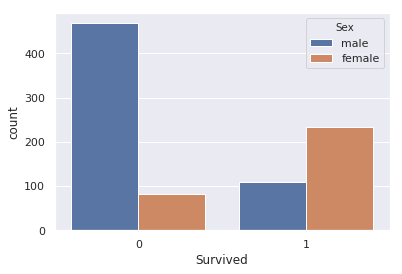

In [26]:
import seaborn as sns
sns.set(style="darkgrid")
sns.countplot(x='Survived', hue='Sex', data=train)

Most of the male passengers died, while the female passengers survived by ~ 70%.

With a Seaborn's violinplot we can see the relation between the Sex, Age and if the passenger survived or not.

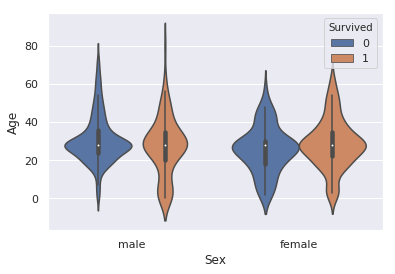

In [27]:
sns.violinplot(x='Sex', y='Age', hue='Survived', data=train)

## Class analysis

Next we are going to focus on the Class of the passenger. We compute a count as with Sex:

In [28]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

and with a catplot we show the count per class, Sex and survived or not.

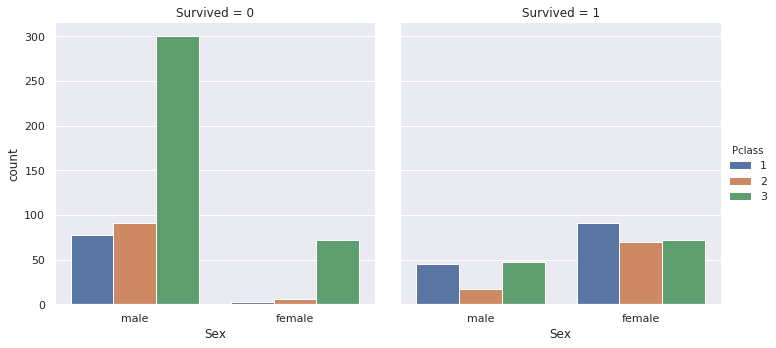

In [29]:
sns.catplot(x='Sex', hue='Pclass', col='Survived', kind='count', data=train)

or the count per embarked port, class and survived or not:

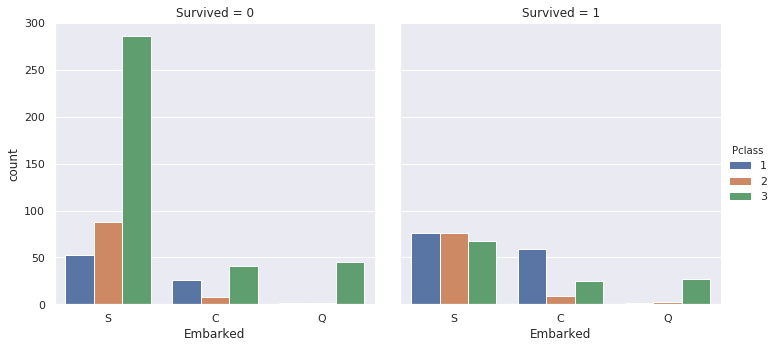

In [30]:
sns.catplot(x='Embarked', hue='Pclass', col='Survived', kind='count', data=train)

and similar with the violinplot:

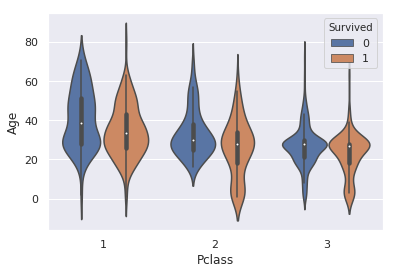

In [31]:
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=train)

## Age analysis

Now it's the turn of the Age. Again, we start with the count:

In [32]:
train.Age.value_counts()

28.00    202
24.00     30
22.00     27
18.00     26
19.00     25
        ... 
55.50      1
70.50      1
66.00      1
23.50      1
0.42       1
Name: Age, Length: 88, dtype: int64

followed by a distplot with 20 bins:

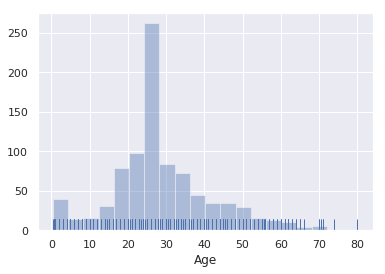

In [33]:
sns.distplot(train.Age, bins=20, kde=False, rug=True)

The pairplot and the heatmap (of the correlation matrix) help us to look for correlations between the features, the provided and the created using feature engineering.

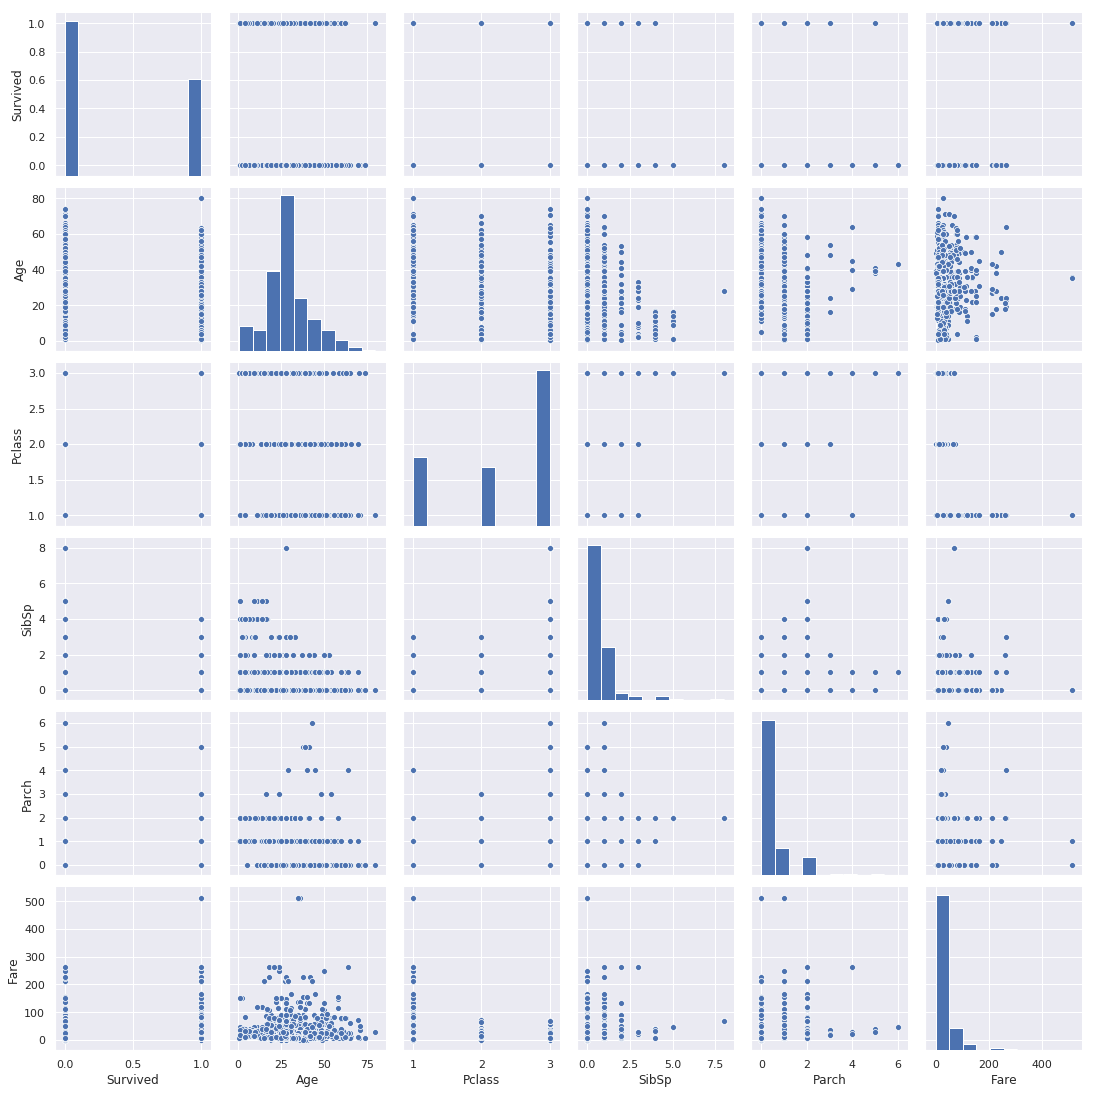

In [34]:
sns.pairplot(train[['Survived', 'Age', 'Sex', 'Pclass', 'SibSp', 'Parch', 'Fare']])

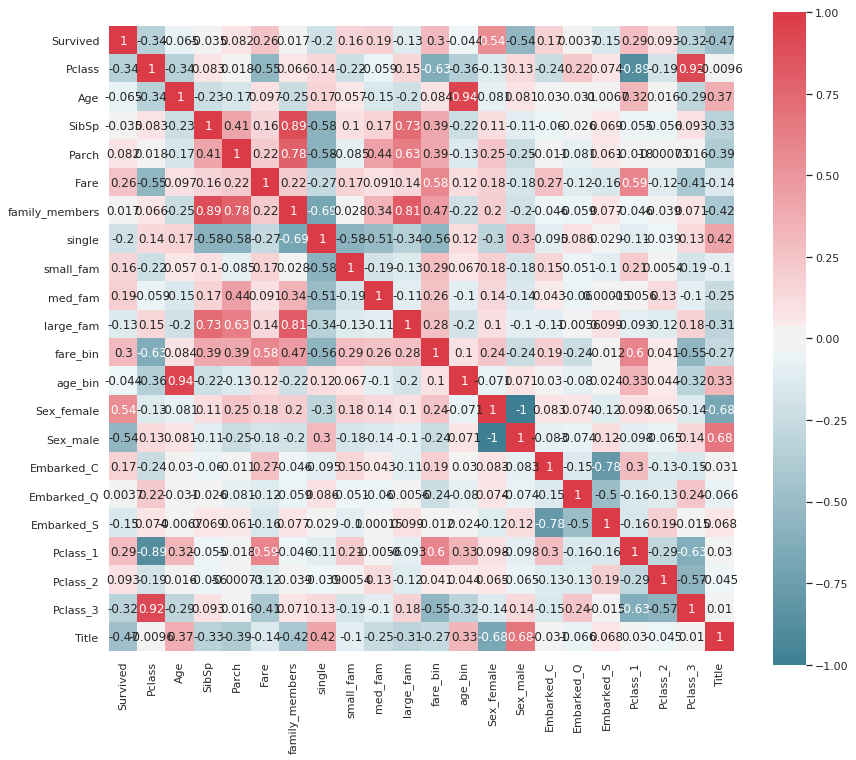

In [35]:
import matplotlib.pyplot as plt
_ , ax = plt.subplots(figsize =(14, 12))
colormap = sns.diverging_palette(220, 10, as_cmap = True)
_ = sns.heatmap(train.corr(), square=True, annot=True, cmap=colormap)

# 4. ML Models

Once we finished the EDA, we can move to the maim goal of this project: the ML algorithms. Before starting to feed the models with the data, some steps are missing. We should preprocess the data in a way that improve the performance and accuracy of the proposed ML models.

## 4.1 Encoding categorical and text features

First, the categorical features (those that are not numerical), must be converted to numbers. We will use OrdinalEncoder to do it. Important: the OrdinalEncoder object must be fitted only to the train data, and then used to transform both the train and the test data:

In [36]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
val_test = test.drop('PassengerId', axis=1)
train[['Sex', 'Embarked', 'age_bin', 'fare_bin']] = ordinal_encoder.fit_transform(train[['Sex', 'Embarked', 'age_bin', 'fare_bin']]).astype('int64')
val_test[['Sex', 'Embarked', 'age_bin', 'fare_bin']] = ordinal_encoder.transform(val_test[['Sex', 'Embarked', 'age_bin', 'fare_bin']]).astype('int64')

## 4.2 Preparing the datasets

Now, we split the train data in train and test, and assign the labels ('Survived') to y, and the features to X. We assign 75% of the train data to train and 25% to test, using StratifiedShuffleSplit, to try to conserve the proportion of labels in all the sets, because we have a small dataset.

In [37]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
X = train.drop('Survived', axis=1)
y = train['Survived']
#X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
split = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)
for train_index, test_index in split.split(X, y):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

In [38]:
train.Survived.value_counts()/len(train)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [39]:
y_train.value_counts() /len(y_train), y_test.value_counts() / len(y_test)

(0    0.616766
 1    0.383234
 Name: Survived, dtype: float64,
 0    0.61435
 1    0.38565
 Name: Survived, dtype: float64)

Fine. The proportion of 0 and 1 for the labels ('Survived') is conserved, and hence there is no introduced bias.

## 4.3 Scaling the numerical features

Now, it's the turn of scaling the features. If we pick two different numerical features, we may find that they have a very different scale: for example, Age can go up to 80, while Pclass has only 3 values (0,1,2). This difference in the numeric scale negatively impacts in the ML models performance, and that's why scaling it's so important. We use StandardScaler to scale all the numerical features (X). For this project, the labels (y) are 0 or 1, so they don't need to be scaled.

In [40]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
X_train = pd.DataFrame(standard_scaler.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(standard_scaler.transform(X_test), columns = X_test.columns)
val_test = pd.DataFrame(standard_scaler.transform(val_test), columns = val_test.columns)

and we obtain the following:

In [41]:
X_train.head(), X_test.head(),

(     Pclass       Sex       Age     SibSp     Parch      Fare  Embarked  \
 0 -1.579334 -1.361874  0.419907  0.536677 -0.451483  1.240397  0.595203   
 1 -0.376375  0.734282 -0.813532 -0.464720 -0.451483 -0.436028  0.595203   
 2 -0.376375  0.734282  0.342817 -0.464720 -0.451483 -0.383310  0.595203   
 3  0.826584 -1.361874 -1.969882 -0.464720  1.951631 -0.192999  0.595203   
 4 -0.376375 -1.361874 -0.659352 -0.464720 -0.451483 -0.436028  0.595203   
 
    family_members    single  small_fam  ...   age_bin  Sex_female  Sex_male  \
 0        0.105501 -1.280748   2.158939  ...  0.847015    1.361874 -1.361874   
 1       -0.553139  0.780794  -0.463191  ... -0.385678   -0.734282  0.734282   
 2       -0.553139  0.780794  -0.463191  ...  0.847015   -0.734282  0.734282   
 3        0.764140 -1.280748  -0.463191  ... -1.618370    1.361874 -1.361874   
 4       -0.553139  0.780794  -0.463191  ... -0.385678    1.361874 -1.361874   
 
    Embarked_C  Embarked_Q  Embarked_S  Pclass_1  Pclass_2  

## 4.4 Defining, training and evaluating the standard models

We will start with a list of basic ML classification models, and train and evaluate the models with the train and test data, respectively. In addition, the model score, RMSE, precision, recall and F1 Score will be computed for each model, providing a new dataframe that will allow a future comparision between different models.

In [42]:
import time
from sklearn import tree
from sklearn.metrics import mean_squared_error, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC, SVC
import xgboost
random_state=2
models = [tree.DecisionTreeClassifier(random_state=random_state), RandomForestClassifier(random_state=random_state), SGDClassifier(random_state=random_state), 
          LinearSVC(random_state=random_state, max_iter=10000), SVC(random_state=random_state, max_iter=10000),
            xgboost.XGBClassifier(random_state=random_state), AdaBoostClassifier(tree.DecisionTreeClassifier(random_state=random_state), random_state=random_state, learning_rate=0.1), 
          ExtraTreesClassifier(random_state=random_state), GradientBoostingClassifier(random_state=random_state)]
columns = ['Name', 'Score', 'RMSE', 'Precision', 'Recall', 'F1 Score']
models_compare = pd.DataFrame(columns=columns)
i=0
for model in models:
    start_time = time.time()
    clf = model
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    models_compare.loc[i, 'Name'] = clf.__class__.__name__
    models_compare.loc[i, 'Score'] = clf.score(X_test, y_test)
    models_compare.loc[i, 'RMSE'] = np.sqrt(mean_squared_error(y_test, predictions))
    models_compare.loc[i, 'Precision'] = precision_score(y_test, predictions)
    models_compare.loc[i, 'Recall'] = recall_score(y_test, predictions)
    models_compare.loc[i, 'F1 Score'] = f1_score(y_test, predictions)
    models_compare.loc[i, 'Execution time'] = time.time()- start_time
    i+=1
models_compare.sort_values(by='Score', ascending=False)

,Name,Score,RMSE,Precision,Recall,F1 Score,Execution time
3,LinearSVC,0.829596,0.4128,0.792683,0.755814,0.77381,0.180037
8,GradientBoostingClassifier,0.807175,0.439119,0.820896,0.639535,0.718954,0.164332
4,SVC,0.802691,0.444195,0.783784,0.674419,0.725,0.041883
1,RandomForestClassifier,0.784753,0.463947,0.7375,0.686047,0.710843,0.316812
5,XGBClassifier,0.7713,0.478225,0.721519,0.662791,0.690909,0.103385
0,DecisionTreeClassifier,0.766816,0.482891,0.717949,0.651163,0.682927,0.018561
6,AdaBoostClassifier,0.766816,0.482891,0.72973,0.627907,0.675,0.239614
7,ExtraTreesClassifier,0.762332,0.487512,0.694118,0.686047,0.690058,0.265826
2,SGDClassifier,0.730942,0.518708,0.632653,0.72093,0.673913,0.024042


With these results, we can compare the accuracy of the models for each metric using Seaborn's catplot:

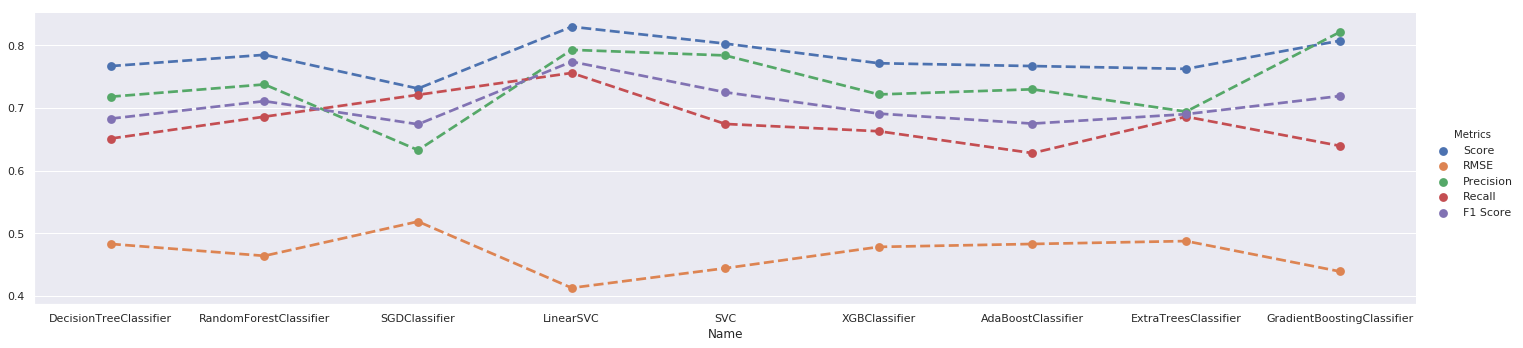

In [43]:
models_compare = models_compare.drop('Execution time', axis=1)
df = models_compare.melt('Name', var_name='Metrics',  value_name='')
import matplotlib.pyplot as plt

g = sns.catplot(x="Name", y="", hue='Metrics', kind='point', aspect=4, markers="o", linestyles= "--", data=df)

# 5. Implementing Cross-Validation

In [44]:
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
models = [tree.DecisionTreeClassifier(random_state=random_state), RandomForestClassifier(random_state=random_state), SGDClassifier(random_state=random_state), 
          LinearSVC(random_state=random_state, max_iter=10000), SVC(random_state=random_state, max_iter=10000),
            xgboost.XGBClassifier(random_state=random_state), AdaBoostClassifier(tree.DecisionTreeClassifier(random_state=random_state), random_state=random_state, learning_rate=0.1), 
          ExtraTreesClassifier(random_state=random_state), GradientBoostingClassifier(random_state=random_state)]
columns = ['Name', 'Score', 'RMSE', 'Precision', 'Recall', 'F1 Score']
models_compare_cv = pd.DataFrame(columns=columns)
i=0
kfold = StratifiedKFold(n_splits=10)
for model in models: 
    start_time = time.time()
    clf = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    predictions = cross_val_predict(model, X_test, y_test, cv=5)
    mse = mean_squared_error(y_test, predictions)
    rmse =np.sqrt(mse)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    models_compare_cv.loc[i, 'Name'] = model.__class__.__name__
    models_compare_cv.loc[i, 'Score'] = clf.mean()
    models_compare_cv.loc[i, 'RMSE'] = rmse
    models_compare_cv.loc[i, 'Precision'] = precision
    models_compare_cv.loc[i, 'Recall'] = recall
    models_compare_cv.loc[i, 'F1 Score'] = f1_score(y_test, predictions)
    models_compare_cv.loc[i, 'Execution time'] = time.time()- start_time
    i+=1
models_compare_cv.sort_values(by='Score', ascending=False)

,Name,Score,RMSE,Precision,Recall,F1 Score,Execution time
4,SVC,0.833876,0.433982,0.797297,0.686047,0.7375,0.260079
3,LinearSVC,0.823406,0.439119,0.779221,0.697674,0.736196,2.154202
5,XGBClassifier,0.818883,0.50999,0.675,0.627907,0.650602,0.906793
8,GradientBoostingClassifier,0.81886,0.49209,0.710526,0.627907,0.666667,2.316761
1,RandomForestClassifier,0.805382,0.482891,0.723684,0.639535,0.679012,4.067919
7,ExtraTreesClassifier,0.794957,0.487512,0.708861,0.651163,0.678788,3.149642
6,AdaBoostClassifier,0.781366,0.518708,0.644444,0.674419,0.659091,2.531042
2,SGDClassifier,0.772637,0.564257,0.586207,0.593023,0.589595,0.130616
0,DecisionTreeClassifier,0.764858,0.539889,0.615385,0.651163,0.632768,0.105357


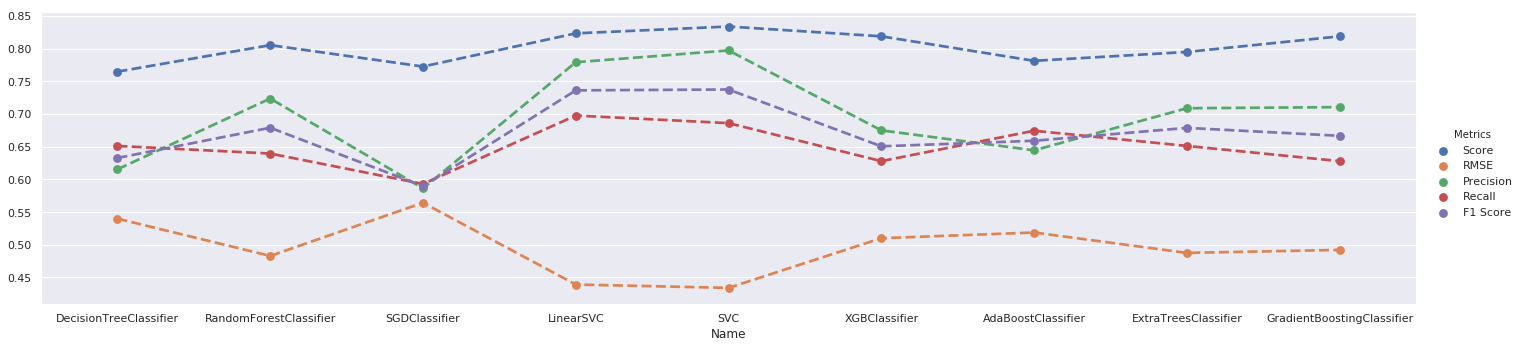

In [45]:
models_compare_cv = models_compare_cv.drop('Execution time', axis=1)
df = models_compare_cv.melt('Name', var_name='Metrics',  value_name='')
g = sns.catplot(x="Name", y="", hue='Metrics', kind='point', aspect=4, markers="o", linestyles= "--", data=df)

In [46]:
models_compare.sort_values('Score', ascending=False).Name.head()

3                     LinearSVC
8    GradientBoostingClassifier
4                           SVC
1        RandomForestClassifier
5                 XGBClassifier
Name: Name, dtype: object

In [47]:
models_compare_cv.sort_values('Score', ascending=False).Name.head()

4                           SVC
3                     LinearSVC
5                 XGBClassifier
8    GradientBoostingClassifier
1        RandomForestClassifier
Name: Name, dtype: object

In both cases, with and without 5-fold cross-validations, the same 5 models perform the best once trained: LinearSVC, Gradient Boosting Classifier, SVC, Random Forest Classifier and XGBClassifier. Then, these models are selected to pass to the next phase, where we will perform a Grid Search to find the best hyperparameter configuration for each model.

# 6. Fine-tuning the models

## 6.1 Searching the best hyperparameters: Grid Search

### 6.1.1 Random Forest Classifier

In [48]:
from sklearn.model_selection import GridSearchCV
forest_grid = {'n_estimators': [10,100,1000], 'max_features':[2,4,6,8], 'bootstrap': [False], 'min_samples_leaf': [2, 4, 6, 8], 'max_depth': [10, 20, 30, 40]},
forest_reg = RandomForestClassifier(random_state=random_state)
grid_search_forest = GridSearchCV(forest_reg, forest_grid, cv=kfold, scoring='accuracy', return_train_score=True, n_jobs=-1)
start_time = time.time()
grid_search_forest.fit(X_train, y_train)
print('Execution time:', time.time() - start_time)

Execution time: 639.7576925754547


In [49]:
grid_search_forest.best_params_, grid_search_forest.best_score_

({'bootstrap': False,
  'max_depth': 10,
  'max_features': 8,
  'min_samples_leaf': 4,
  'n_estimators': 1000},
 0.8427860696517412)

In [50]:
forest_be = grid_search_forest.best_estimator_

### 6.1.2 Linear SVC

In [51]:
linear_svc_grid = [
    {'tol': [0.01, 0.1, 0.3, 0.5], 'loss': ['hinge', 'squared_hinge'], 'max_iter':[760000]}
]
linear_svc = LinearSVC(random_state=random_state)
grid_search_linearsvc = GridSearchCV(linear_svc, linear_svc_grid, cv=kfold, scoring='accuracy', return_train_score=True, n_jobs=-1)
start_time = time.time()
grid_search_linearsvc.fit(X_train, y_train)
print('Execution time:', time.time() - start_time)

Execution time: 1.0104641914367676


In [52]:
grid_search_linearsvc.best_params_, grid_search_linearsvc.best_score_

({'loss': 'hinge', 'max_iter': 760000, 'tol': 0.01}, 0.8278833107191316)

In [53]:
linearsvc_be = grid_search_linearsvc.best_estimator_

### 6.1.3 Gradient Boosting Classifier

In [54]:
gbc = GradientBoostingClassifier(random_state=random_state)
gbc_grid = {'loss': ['deviance'], 'n_estimators' : [100,200,300],
            'learning_rate' : [0.1, 0.05, 0.01], 'max_depth': [4,6,8],
            'min_samples_leaf': [2,3,4], 'max_features': [1.0,0.3, 0.1]}
grid_search_gbc = GridSearchCV(gbc, param_grid = gbc_grid, cv=kfold, scoring='accuracy', return_train_score=True, n_jobs=-1)
start_time = time.time()
grid_search_gbc.fit(X_train, y_train)
print('Execution time:', time.time() - start_time)

Execution time: 511.7840301990509


In [55]:
grid_search_gbc.best_params_, grid_search_gbc.best_score_

({'learning_rate': 0.1,
  'loss': 'deviance',
  'max_depth': 4,
  'max_features': 1.0,
  'min_samples_leaf': 2,
  'n_estimators': 100},
 0.8397783808231569)

In [56]:
gbc_be = grid_search_gbc.best_estimator_

### 6.1.4 SVC

In [57]:
svc = SVC(probability=True, random_state=random_state)
svc_grid = {'kernel': ['rbf'], 'gamma' : [0.001, 0.01, 0.1], 'C':[1,5,10]}
grid_search_svc = GridSearchCV(svc, param_grid=svc_grid, cv=kfold, scoring='accuracy')
start_time = time.time()
grid_search_svc.fit(X_train, y_train)
print('Execution time:', time.time() - start_time)

Execution time: 8.395126104354858


In [58]:
grid_search_svc.best_params_, grid_search_svc.best_score_

({'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}, 0.8368385345997286)

In [59]:
svc_be = grid_search_svc.best_estimator_

### 6.1.5 XGBClassifier

In [60]:
xgb = xgboost.XGBClassifier(random_state=random_state)
xgb_grid = {'max_depth':[2,4,8], 'learning_rate':[0.001, 0.01,0.1,0.5], 'random_state': [random_state]}
grid_search_xgb = GridSearchCV(xgb, param_grid=xgb_grid, cv=kfold, scoring='accuracy')
start_time = time.time()
grid_search_xgb.fit(X_train, y_train)
print('Execution time:', time.time()- start_time)

Execution time: 7.370767593383789


In [61]:
grid_search_xgb.best_params_, grid_search_xgb.best_score_

({'learning_rate': 0.5, 'max_depth': 2, 'random_state': 2}, 0.8413161465400272)

In [62]:
xgb_be = grid_search_xgb.best_estimator_

## 6.2 Ensemble Learning

In [63]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators= [('rf', forest_be), ('svc', svc_be), ('linear_svc', linearsvc_be), ('gb', gbc_be), ('xgb', xgb_be)], voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=False,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=10,
                                                     max_features=8,
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=4,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
              

In [64]:
from sklearn.metrics import accuracy_score
for clf in [forest_be, svc_be, linearsvc_be, gbc_be, xgb_be, voting_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

RandomForestClassifier 0.7982062780269058
SVC 0.7982062780269058
LinearSVC 0.8161434977578476
GradientBoostingClassifier 0.8026905829596412
XGBClassifier 0.7847533632286996
VotingClassifier 0.8071748878923767


## Final Model Submission

In [65]:
test_final = val_test.copy()
voting_clf.fit(X_train, y_train)
voting_clf.score(test_final, gender_submission['Survived'])

0.8755980861244019

In [66]:
test_final['Survived'] = voting_clf.predict(test_final)

In [67]:
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId'].copy().astype('int')
submission['Survived'] = test_final['Survived']
submission.to_csv('../working/submit.csv', index=False)